In [2]:
import qflib as qf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spot = 100
time_to_exp = 1
int_rate = 0.04
div_yield = 0.01
asset_vol = 0.4
fx_vol = 0.1
asset_fx_corr = np.arange(-1.0, 1.1, 0.1)

vectorized_fwd_price = np.vectorize(lambda corr: qf.qFwdPrice(spot, time_to_exp, int_rate, div_yield, asset_vol, fx_vol, corr))

quanto_forward_prices = vectorized_fwd_price(asset_fx_corr)
quanto_forward_prices

array([ 99.00498337,  99.40179641,  99.80019987, 100.20020013,
       100.60180361, 101.00501671, 101.40984589, 101.81629764,
       102.22437845, 102.63409485, 103.0454534 , 103.45846067,
       103.87312329, 104.28944788, 104.7074411 , 105.12710964,
       105.54846022, 105.97149957, 106.39623447, 106.82267172,
       107.25081813])

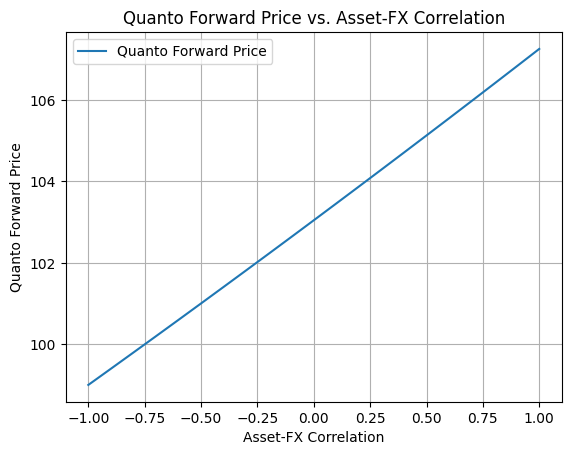

In [4]:
plt.plot(asset_fx_corr, quanto_forward_prices, label="Quanto Forward Price")
plt.xlabel('Asset-FX Correlation')
plt.ylabel('Quanto Forward Price')
plt.title('Quanto Forward Price vs. Asset-FX Correlation')
plt.grid(True)
plt.legend()
plt.show()

The graph is increasing becasue as correlation between the asset and the currency increases, the asset price and the exchange rate will move in the same direction. This means that as asset price increases, so does the exhange rate, which acts as a hedge of the market risk we face since we have a locked exchange rate. If both asset and exhange rate falls then the high correlation acts as a hedge of the exchange rate risk that we face. This dual hedging property that highly correlated forward contracts have increase the price keeping all else equal.

In [5]:
spot = 100
time_to_exp = 1
int_rate = 0.04
div_yield = 0.01
asset_vol = 0.4
n = 10000

u = np.random.random_sample(n)
vectorized_normalInvCdf = np.vectorize(qf.normalInvCdf)
Z = vectorized_normalInvCdf(u)

S_T = spot * np.exp((int_rate - div_yield - 0.5 * asset_vol**2) * time_to_exp + asset_vol * np.sqrt(time_to_exp) * Z)

sample_mean = np.mean(S_T)

exact_mean = spot * np.exp((int_rate - div_yield) * time_to_exp)

sample_std = np.std(S_T)
standard_error = sample_std / np.sqrt(n)
difference = (sample_mean - exact_mean) / standard_error

print(f"Sample Mean: {sample_mean}")
print(f"Exact Mean: {exact_mean}")
print(f"Standard Error: {standard_error}")
print(f"Difference as a multiple of the standard error: {difference}")

Sample Mean: 103.56946533151516
Exact Mean: 103.0454533953517
Standard Error: 0.43088575910053495
Difference as a multiple of the standard error: 1.2161273031100521
